In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
from scipy.optimize import minimize

In [2]:
def mass_profile_file(file_path):
    hf = h5py.File(file_path, 'r')
    dist = np.array(hf['distances'])
    dens = np.array(hf['densities'])
    dens_sphere = dens * 4*np.pi*(dist**2)
    m_enc = np.zeros(len(dens))
    sum = 0
    for i in range(0, len(m_enc) - 1):
        dr = dist[i + 1] - dist[i]
        upper_rect = dens_sphere[i] * dr
        lower_rect = dens_sphere[i + 1] *dr
        trap = (upper_rect + lower_rect) / 2
        sum = sum + trap 
        m_enc[i+ 1] = sum
    return dist, m_enc

In [3]:
file1 = path_4 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f4L20T4n400r400/radial0400.h5'


In [4]:
def radial_plotter_file_cubic(file_path, r ,f_val, slope_points):
    data = mass_profile_file(file_path)
    plt.scatter(data[0], data[1])
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Radial Distance (kpc)')
    plt.ylabel('M(enclosed) (Msun)')
    plt.title('Enclosed Mass vs. Distance: f = ' + str(f_val) + ', r = '+ str(r))
    plt.ylim(10**(5), 10**(14))
    plt.xlim(10**(-3), 10**(2))
    
    del_x = (data[0][slope_points]) - (data[0][1])
    del_y = (data[1][slope_points]) - (data[1][1])
    slope = del_y/del_x
    print(data[1][slope_points])
    test_r = np.linspace(0, 1000, 1000000)
    cubic =  10**(11)*(4/3)*np.pi*(test_r**3)
    plt.plot(test_r,cubic, 'g')
    plt.legend(['Core Slope = ' + str(slope), 'Test Slope = 3.0'])
    plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/enclosed_mass/r'+ str(r)+ '/f' + str(f_val) + '.png')

198893569.98059484


/home/mnotis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/mnotis/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


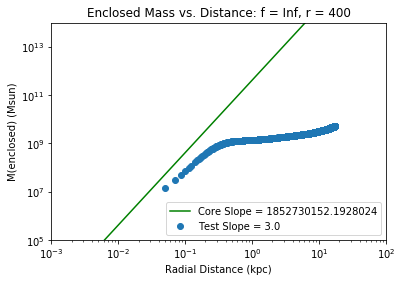

In [5]:
path_Inf = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/fInfL20T4n400r400/radial0400.h5'
radial_plotter_file_cubic(path_Inf, 400, 'Inf', 8)

198893569.98059484


/home/mnotis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/mnotis/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


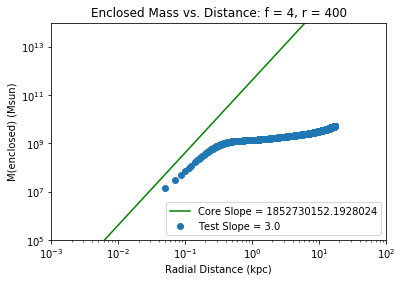

In [13]:
path_4 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f4L20T4n400r400/radial0400.h5'
radial_plotter_file_cubic(path_Inf, 400, 4, 8)

In [5]:
path_Inf = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/fInfL20T4n400r400/radial0400.h5'
hf = h5py.File(path_Inf, 'r')
distInf = np.array(hf['distances'])
densInf = np.array(hf['densities'])
densInfsph = densInf * 4* np.pi*(distInf**2)
print('Inf[8] = ' + str(densInfsph[8]))
path_4 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f2L20T4n400r400/radial0400.h5'
hf2 = h5py.File(path_4, 'r')
dist4 = np.array(hf2['distances'])
dens4 = np.array(hf2['densities'])
dens4sph = dens4 * 4* np.pi*(dist4**2)
print('Four[8] = ' + str(dens4sph[8]))



Inf[8] = 3181986833.3634777
Four[8] = 3948235769.157549
